<a href="https://colab.research.google.com/github/benbaz-2/comp551/blob/main/assignment1_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Package imports

In [1]:
pip install ucimlrepo;

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split
import pdb

### Importing data

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

### Data cleaning and exploratory data analysis

In [4]:
# Taking a look at the data
# The data looks like it was already processed
pd.set_option('display.max_columns', None)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [5]:
y.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


In [6]:
# Checking for missing values
# Great, no missing values
X.isnull().sum()

,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


In [7]:
y.isnull().sum()

,0
Diabetes_binary,0


In [8]:
# looking at descriptive statistics and variable distributions
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
#X.hist(figsize=(20,20));

In [10]:
# scaling data
numerical = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
for n in numerical:
    values = np.array(X[n])
    mean = np.mean(values)
    std = np.std(values)
    X.loc[:, n] = (values - mean) / std
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,1.757936,1,0,0,0,0,1,0,1,0,2.329121,1.998592,1.233999,1,0,0.316900,-1.065595,-1.474487
1,0,0,0,-0.511806,1,0,0,1,0,0,0,0,1,0.457294,-0.429630,-0.486592,0,0,-0.337933,0.963272,-2.440138
2,1,1,1,-0.057858,0,0,0,0,1,0,0,1,1,2.329121,3.617407,2.954590,1,0,0.316900,-1.065595,0.939638
3,1,0,1,-0.209174,0,0,0,1,1,1,0,1,0,-0.478619,-0.429630,-0.486592,0,0,0.971733,-2.080028,-0.026012
4,1,1,1,-0.663122,0,0,0,1,1,1,0,1,0,-0.478619,-0.024926,-0.486592,0,0,0.971733,-0.051162,-0.991662


array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >, <Axes: >, <Axes: >,


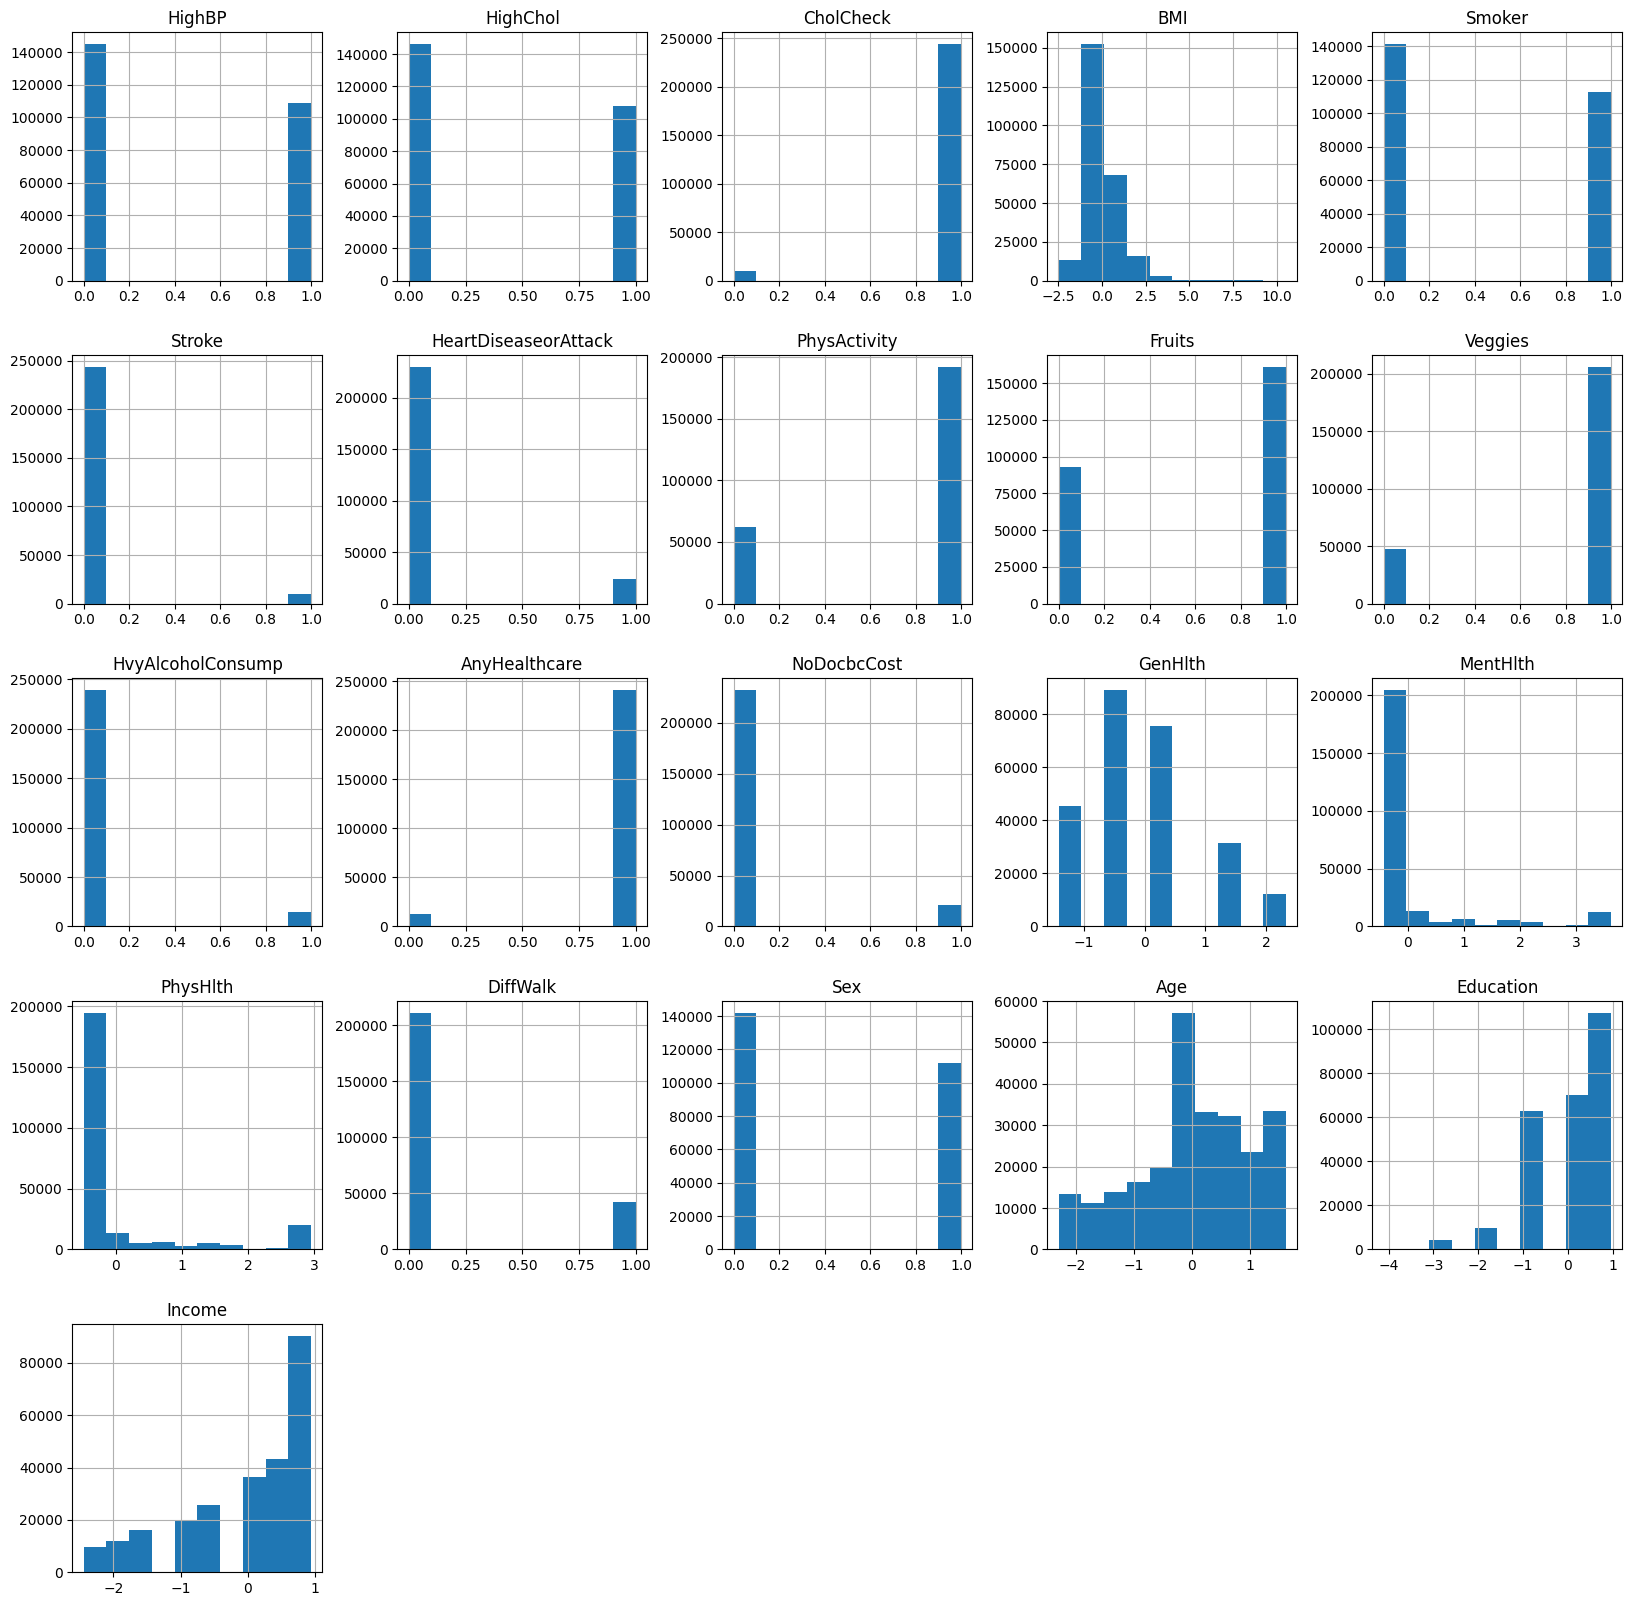

In [11]:
X.hist(figsize=(20,20))

array([[<Axes: title={'center': 'Diabetes_binary'}>]], dtype=object)

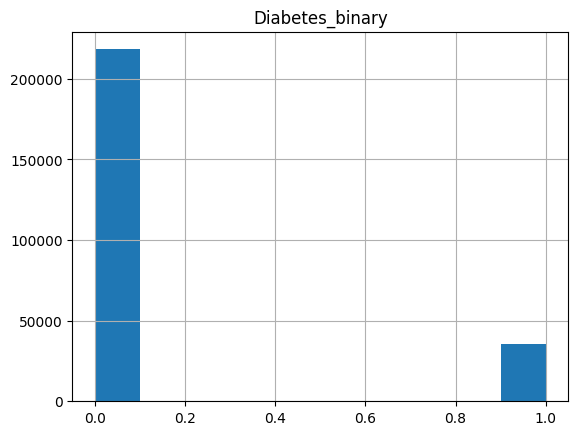

In [12]:
# Looking at the distribution of the dependant variable
# The data set is not balanced (which makes sense)
y.hist()

### Implementing the model

In [13]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def logistic(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, x, y):
        return np.mean(y * np.log1p(np.exp(-np.dot(x, self.w))) + (1-y) * np.log1p(np.exp(np.dot(x, self.w))))

    def gradient(self, x, y):
        pdb.set_trace()
        a = np.dot(x, self.w)
        print(y, type(y))
        print(a, type(a))
        print(y.shape, a.shape)
        b = a - y
        c = self.logistic(b)
        d = c / len(y)
        e = np.dot(x.T, c)
        return e

    def gradient_descent(self, x, y):
        return np.dot(x.T, self.logistic(np.dot(x, self.w)) - y) / len(y)

    def fit(self, x, y):
        x = np.array(x)
        y = np.array(y)
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh


### Fitting the data

In [14]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.to_numpy()
y_train.to_numpy()

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [16]:
model = LogisticRegression(verbose=True)
#model.fit(X_train, y_train)

In [17]:
arr = np.linspace(1, 100, 100)
np.array(arr)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [18]:
y_train.head()

,Diabetes_binary
31141,0
98230,0
89662,1
208255,0
233415,0


In [19]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,1.757936,1,0,0,0,0,1,0,1,0,2.329121,1.998592,1.233999,1,0,0.316900,-1.065595,-1.474487
1,0,0,0,-0.511806,1,0,0,1,0,0,0,0,1,0.457294,-0.429630,-0.486592,0,0,-0.337933,0.963272,-2.440138
2,1,1,1,-0.057858,0,0,0,0,1,0,0,1,1,2.329121,3.617407,2.954590,1,0,0.316900,-1.065595,0.939638
3,1,0,1,-0.209174,0,0,0,1,1,1,0,1,0,-0.478619,-0.429630,-0.486592,0,0,0.971733,-2.080028,-0.026012
4,1,1,1,-0.663122,0,0,0,1,1,1,0,1,0,-0.478619,-0.024926,-0.486592,0,0,0.971733,-0.051162,-0.991662


In [20]:
g = np.inf
np.linalg.norm(g)

inf